In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D , Dense, MaxPool2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import *
from matplotlib import image
import h5py
import os
from keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
normal = os.listdir(r"/content/drive/MyDrive/lung_disease_dataset/train/Normal")
covid = os.listdir(r"/content/drive/MyDrive/lung_disease_dataset/train/COVID")
pneumonia = os.listdir(r"/content/drive/MyDrive/lung_disease_dataset/train/Viral Pneumonia")

In [ ]:
print("No. of normal images are:",len(normal))
print("No. of covid-19 images are:",len(covid))
print("No. of pneumonia images are:",len(pneumonia))

No. of normal images are: 5667
No. of covid-19 images are: 4263
No. of pneumonia images are: 2034


<Axes: >

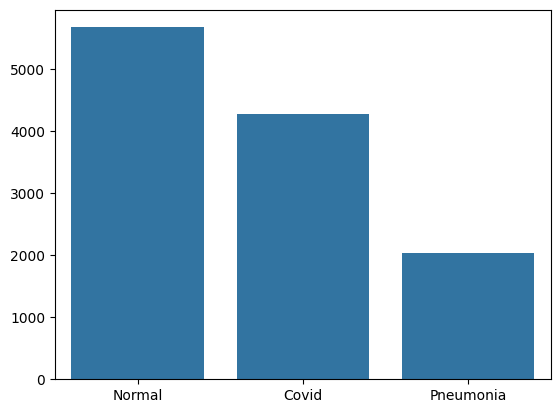

In [ ]:
sns.barplot(x=["Normal","Covid","Pneumonia"],y=[len(normal),len(covid),len(pneumonia)])

Normal Image


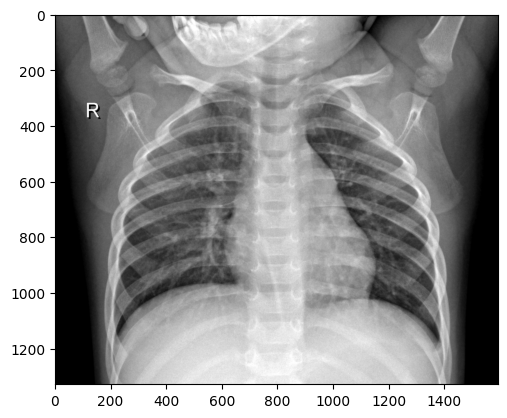

In [6]:
normal_image = load_img(r"/content/drive/MyDrive/lung_disease_dataset/train/Normal/IM-0349-0001.jpeg")
print("Normal Image")
plt.imshow(normal_image)
plt.show()

Covid-19 Image


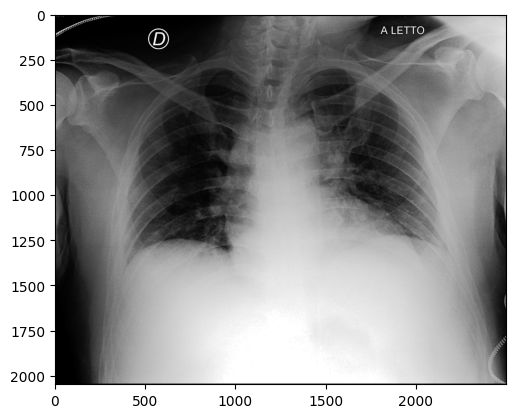

In [7]:
covid_image = load_img(r"/content/drive/MyDrive/lung_disease_dataset/train/COVID/012.jpeg")
print("Covid-19 Image")
plt.imshow(covid_image)
plt.show()

Pneumonia Image


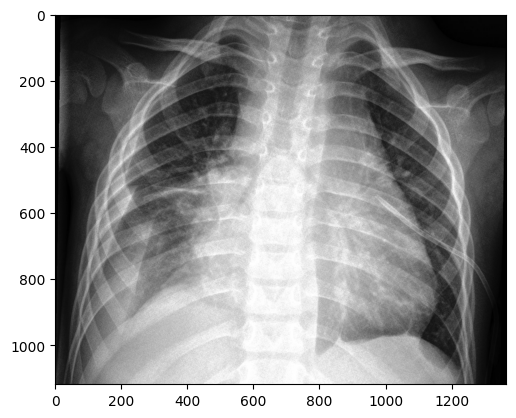

In [8]:
pneumonia_image = load_img(r"/content/drive/MyDrive/lung_disease_dataset/train/Viral Pneumonia/011.jpeg")
print("Pneumonia Image")
plt.imshow(pneumonia_image)
plt.show()

In [9]:
train_path = r"/content/drive/MyDrive/lung_disease_dataset/train"
test_path =  r"/content/drive/MyDrive/lung_disease_dataset/test"
val_path = r"/content/drive/MyDrive/lung_disease_dataset/val"

In [10]:
train_datagen = ImageDataGenerator(
                rescale = 1/255.0,
                rotation_range = 20,
                horizontal_flip = True,
                vertical_flip = True,
                fill_mode = 'nearest'
                )

In [11]:
valid_datagen = ImageDataGenerator(
                rescale = 1/255.0,
                rotation_range = 20,
                horizontal_flip=True,
                vertical_flip = True,
                fill_mode = 'nearest'
                )

In [12]:
test_datagen = ImageDataGenerator(
            rescale = 1/255.0)
batch_size = 16

In [13]:
train_generator = train_datagen.flow_from_directory(
            train_path,
            target_size =(256,256),
            batch_size = batch_size,
            class_mode = 'categorical')

Found 11849 images belonging to 3 classes.


In [14]:
train_generator.class_indices

{'COVID': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [15]:
valid_generator = valid_datagen.flow_from_directory(
                    val_path,
                    target_size = (256,256),
                    batch_size = batch_size,
                    class_mode = 'categorical')

Found 251 images belonging to 3 classes.


In [16]:
valid_generator.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [17]:
test_generator = test_datagen.flow_from_directory(
                  test_path,
                    target_size = (256,256),
                    batch_size = batch_size,
                    class_mode ='categorical')

Found 66 images belonging to 3 classes.


In [18]:
test_generator.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [19]:
from keras.applications import ResNet50V2

In [20]:
resnet_model = ResNet50V2(input_shape=(256,256,3),include_top = False,weights = 'imagenet',classes=3,pooling = 'max')

for layer in resnet_model.layers:
    layer.trainable = False

model3 = Sequential()
model3.add(resnet_model)
model3.add(Flatten())
model3.add(Dense(128, activation = "relu"))
model3.add(Dropout(0.2))
model3.add(Dense(3, activation = "softmax"))

94668760/94668760 [==============================] - 1s 0us/step


In [21]:
model3.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [22]:
model3.fit(train_generator,validation_data = valid_generator,epochs = 3, verbose=1,batch_size=16)

Epoch 1/3
741/741 [==============================] - 4975s 7s/step - loss: 0.6033 - accuracy: 0.8063 - val_loss: 0.5236 - val_accuracy: 0.7371
Epoch 2/3
741/741 [==============================] - 3007s 4s/step - loss: 0.3372 - accuracy: 0.8596 - val_loss: 0.6036 - val_accuracy: 0.7928
Epoch 3/3
741/741 [==============================] - 2965s 4s/step - loss: 0.3162 - accuracy: 0.8729 - val_loss: 0.5741 - val_accuracy: 0.7530


In [23]:
df = pd.DataFrame(model3.history.history)

<Axes: >

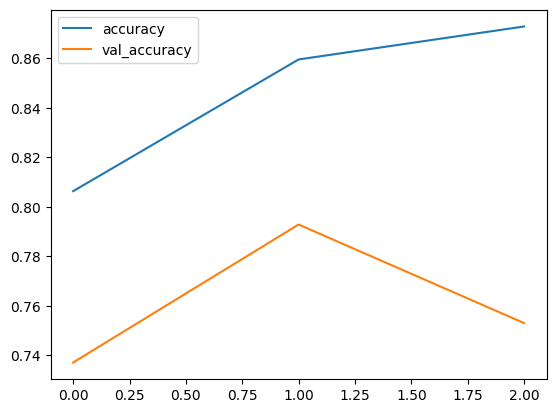

In [24]:
df_losses = df.drop(['loss','val_loss'],axis=1)
df_losses.plot()

<Axes: >

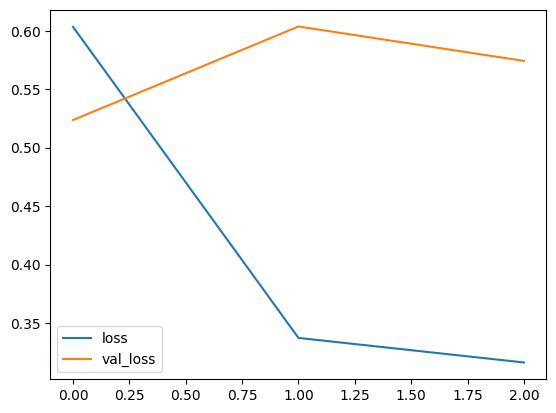

In [25]:
df_acc = df.drop(['accuracy','val_accuracy'],axis=1)
df_acc.plot()

In [26]:
print("The accuracy of ResNet Model:",df_losses['val_accuracy'].max() * 100)
print("The loss of ResNet Model:",df_acc['val_loss'].min() *100)

The accuracy of ResNet Model: 79.28286790847778
The loss of ResNet Model: 52.35949158668518


In [27]:
from tensorflow.keras.preprocessing import image

In [28]:
path = r"/content/drive/MyDrive/lung_disease_dataset/val/Covid/01.jpeg"

In [29]:
img = image.load_img(path, target_size = (256,256,3))
img = image.img_to_array(img)/255.0

img = np.array([img])
img.shape

(1, 256, 256, 3)

In [30]:
result = np.argmax(model3.predict(img))
print(result)
if result==0:
    print("COVID-19")
elif result==1:
    print("NORMAL")
elif result==2:
    print("VIRAL PNEUMONIA")

1/1 [==============================] - 2s 2s/step
0
COVID-19


In [31]:
model3.save("model3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
